In [7]:
import imageio as iio
import visvis as vv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import csv
import os
%matplotlib inline
pd.options.mode.chained_assignment = None  

In [8]:
df = pd.read_csv('savedwork.csv')

In [9]:
df

,hash,site_nm,date,country,img_url,img_full_nm,winner,404_error,unique_color_count_50,average_color,dominant_color
0,f810500fcf4ffdbd89571a469951c835,July,2022-06-10,United States,https://assets.awwwards.com/awards/media/cache...,f810500fcf4ffdbd89571a469951c835.png,0.0,0.0,1660.0,#ffffff,#000000
1,147fd1ccb1a369fa1663d26dfff9bdd9,Shaping Better Maritime World,2022-05-06,France,https://assets.awwwards.com/awards/media/cache...,147fd1ccb1a369fa1663d26dfff9bdd9.jpg,0.0,0.0,1327.0,#ff0000,#000000
2,e077a8deb52eb3dc2560248fb6b2fb2f,No Fun Studio,2022-03-30,United States,https://assets.awwwards.com/awards/media/cache...,e077a8deb52eb3dc2560248fb6b2fb2f.png,0.0,0.0,1312.0,#ffffff,#ffffff
3,9313bd9422860e60229e52f2f5f8dafd,Dynamic Solution,2022-03-29,Germany,https://assets.awwwards.com/awards/media/cache...,9313bd9422860e60229e52f2f5f8dafd.jpg,0.0,0.0,525.0,#000000,#000000
4,f14a4c67cadf1cfb5d6b9cb8ec2c432a,AllCaps,2022-03-28,Czech Republic,https://assets.awwwards.com/awards/media/cache...,f14a4c67cadf1cfb5d6b9cb8ec2c432a.png,0.0,0.0,309.0,#ffffff,#ffffff
...,...,...,...,...,...,...,...,...,...,...,...
9810,27971fd45b0cd48d79a7323c1a170203,UNLOCK YOU｜WW,2019-12-09,Japan,https://assets.awwwards.com/awards/media/cache...,27971fd45b0cd48d79a7323c1a170203.jpg,1.0,0.0,1062.0,#000000,#000000
9811,ab5ea49896c0534621131fdaac491c15,The Scott Resort & Spa,2019-12-08,United Kingdom,https://assets.awwwards.com/awards/media/cache...,ab5ea49896c0534621131fdaac491c15.jpg,1.0,0.0,1445.0,#000000,#000000
9812,bfb60a6e07853064a377f4c7d5f5a6d6,Sacha Tourtoulou - Portfolio,2019-12-07,France,https://assets.awwwards.com/awards/media/cache...,bfb60a6e07853064a377f4c7d5f5a6d6.jpg,1.0,0.0,526.0,#ffffff,#ffffff
9813,799957330d0cc8fb36c3439cd9252688,The Geek Designer,2019-12-06,United States,https://assets.awwwards.com/awards/media/cache...,799957330d0cc8fb36c3439cd9252688.png,1.0,0.0,1155.0,#ff0000,#ff0000


#### Formatting Dates to Date Types

In [10]:
print(df['date'].dtype)
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

object
datetime64[ns]


#### Creating Date Parts

In [38]:
df['weekday'] = df['date'].dt.day_of_week
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

2021    4358
2020    4086
2022    1131
2019     240
Name: year, dtype: int64

#### Reviewing Weekday Trends

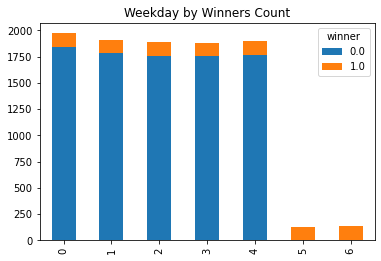

In [70]:
weekday_df = df.groupby(['weekday','winner'])['year'].count().unstack('winner').reset_index().set_index('weekday')
weekday_df.index.names = [None]
weekday_df.head()
ax = weekday_df[[0.0,1.0]].plot(kind='bar', stacked=True, title = 'Weekday by Winners Count')

#### Need to Remove Weekdays of 5 & 6 as these are have winner details but no nominees

In [86]:
weekday_df

winner,0.0,1.0
0,1846,126
1,1784,128
2,1757,128
3,1752,130
4,1770,129
5,2,127
6,7,129


In [91]:
print("DF length before removing Saturdays: "+str(len(df)))
df = df[(df['weekday']!=5)]
print("DF length after removing Saturdays: "+str(len(df)))
df = df[(df['weekday']!=6)]
print("DF length after removing Sundays: "+str(len(df)))

DF length before removing Saturdays: 9815
DF length after removing Saturdays: 9686
DF length after removing Sundays: 9550


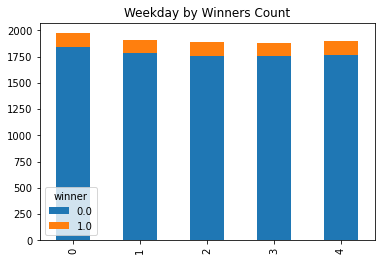

In [92]:
weekday_df = df.groupby(['weekday','winner'])['year'].count().unstack('winner').reset_index().set_index('weekday')
weekday_df.index.names = [None]
weekday_df.head()
ax = weekday_df[[0.0,1.0]].plot(kind='bar', stacked=True, title = 'Weekday by Winners Count')

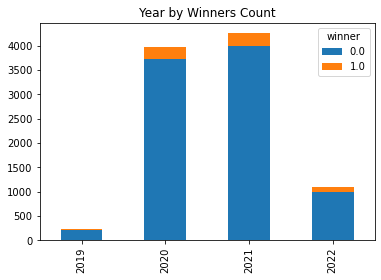

In [93]:
year_df = df.groupby(['year','winner'])['year'].count().unstack('winner').reset_index().set_index('year')
year_df.index.names = [None]
year_df.head()
ax = year_df[[0.0,1.0]].plot(kind='bar', stacked=True, title = 'Year by Winners Count')

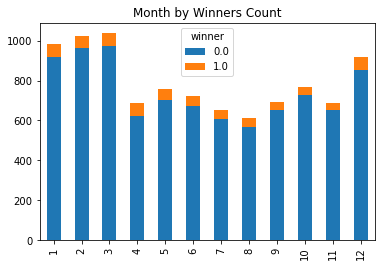

In [94]:
month_df = df.groupby(['month','winner'])['month'].count().unstack('winner').reset_index().set_index('month')
month_df.index.names = [None]
month_df.head()
ax = month_df[[0.0,1.0]].plot(kind='bar', stacked=True, title = 'Month by Winners Count')

<AxesSubplot:title={'center':'Day by Winners Count'}>

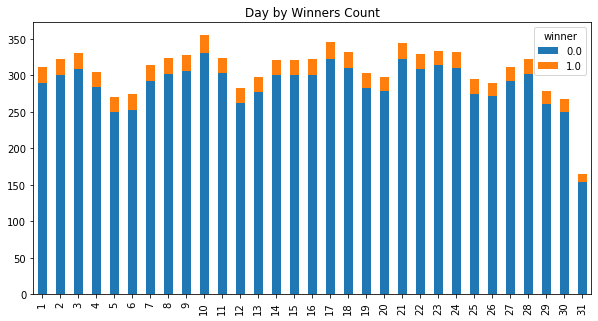

In [103]:
day_df = df.groupby(['day','winner'])['day'].count().unstack('winner').reset_index().set_index('day')
day_df.index.names = [None]
day_df.head()
day_df[[0.0,1.0]].plot(kind='bar', stacked=True, title = 'Day by Winners Count', figsize=(10, 5))

#### Solving for Imbalanced Classes

Non-Winners Count: 8909
Winners Count:641
Diff: 8268


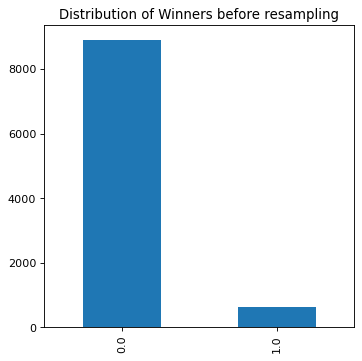

In [105]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

print('Non-Winners Count: '+str(len(df[df['winner']==0])))
print('Winners Count:'+ str(len(df[df['winner']==1])))
df_win = df[df['winner']==1]
df_nom = df[df['winner']==0]
diff = len(df[df['winner']==0]) - len(df[df['winner']==1])
print("Diff: "+str(diff))
figure(figsize=(5, 5), dpi=80)
df['winner'].value_counts().plot(kind='bar')

pyplot.xticks(rotation = 90)
plt.title("Distribution of Winners before resampling")
pyplot.show()

#### Random Sampling with Replacement

In [106]:
from random import choices
df_smpld = df_win.iloc[np.random.randint(0, len(df_win), size=diff)]
print(len(df_smpld))
df = pd.concat([df, df_smpld], axis=0)

8268


Non-Winners Count: 8909
Winners Count:8909
Diff: 0


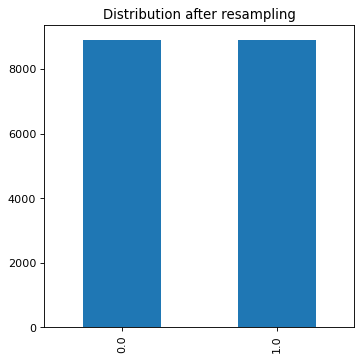

In [107]:

print('Non-Winners Count: '+str(len(df[df['winner']==0])))
print('Winners Count:'+ str(len(df[df['winner']==1])))
diff = len(df[df['winner']==0]) - len(df[df['winner']==1])
print("Diff: "+str(diff))
figure(figsize=(5, 5), dpi=80)
df['winner'].value_counts().plot(kind='bar')

pyplot.xticks(rotation = 90)
plt.title("Distribution after resampling")
pyplot.show()

#### Encode non-numeric features

In [109]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df["country"])
df['country_enc']=(le.transform(df["country"]))

le.fit(df["average_color"])
df['average_color_enc']=(le.transform(df["average_color"]))

le.fit(df["dominant_color"])
df['dominant_color_enc']=(le.transform(df["dominant_color"]))

In [205]:
df.head()

,hash,site_nm,date,country,img_url,img_full_nm,winner,404_error,unique_color_count_50,average_color,dominant_color,weekday,day,year,month,country_enc,average_color_enc,dominant_color_enc
0,f810500fcf4ffdbd89571a469951c835,July,2022-06-10,United States,https://assets.awwwards.com/awards/media/cache...,f810500fcf4ffdbd89571a469951c835.png,0.0,0.0,1660.0,#ffffff,#000000,4,10,2022,6,96,7,0
1,147fd1ccb1a369fa1663d26dfff9bdd9,Shaping Better Maritime World,2022-05-06,France,https://assets.awwwards.com/awards/media/cache...,147fd1ccb1a369fa1663d26dfff9bdd9.jpg,0.0,0.0,1327.0,#ff0000,#000000,4,6,2022,5,30,4,0
2,e077a8deb52eb3dc2560248fb6b2fb2f,No Fun Studio,2022-03-30,United States,https://assets.awwwards.com/awards/media/cache...,e077a8deb52eb3dc2560248fb6b2fb2f.png,0.0,0.0,1312.0,#ffffff,#ffffff,2,30,2022,3,96,7,7
3,9313bd9422860e60229e52f2f5f8dafd,Dynamic Solution,2022-03-29,Germany,https://assets.awwwards.com/awards/media/cache...,9313bd9422860e60229e52f2f5f8dafd.jpg,0.0,0.0,525.0,#000000,#000000,1,29,2022,3,32,0,0
4,f14a4c67cadf1cfb5d6b9cb8ec2c432a,AllCaps,2022-03-28,Czech Republic,https://assets.awwwards.com/awards/media/cache...,f14a4c67cadf1cfb5d6b9cb8ec2c432a.png,0.0,0.0,309.0,#ffffff,#ffffff,0,28,2022,3,23,7,7


#### Remove unnecessary columns

In [406]:
corr_cols = ['winner', 'day','month','year','country_enc','average_color_enc','dominant_color_enc', 'unique_color_count_50']
cols = ['day','month','year','country_enc','average_color_enc','dominant_color_enc', 'unique_color_count_50']
data = df[cols]
target = df['winner']

In [407]:
data.shape

(17818, 7)

In [408]:
target.shape

(17818,)

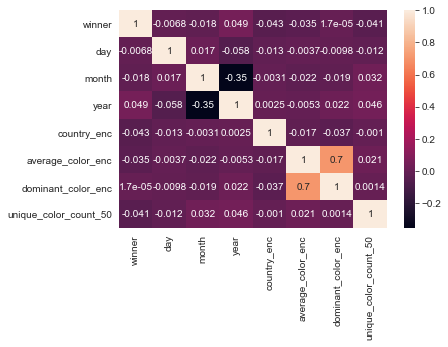

In [409]:
import seaborn as sn
corrMatrix = df[corr_cols].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [410]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0)

In [411]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (13363, 7)
y_train shape: (13363,)


In [412]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (4455, 7)
y_test shape: (4455,)


In [413]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [414]:
print("Model score:")
print(knn.score(X_test,y_test))

Model score:
0.9099887766554433


In [415]:
no_neighbors = np.arange(2, 20)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

In [416]:
data.columns

Index(['day', 'month', 'year', 'country_enc', 'average_color_enc',
       'dominant_color_enc', 'unique_color_count_50'],
      dtype='object')

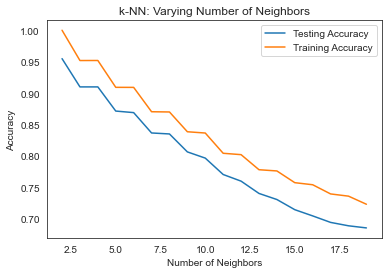

2: 0.9549
3: 0.91
4: 0.91
5: 0.8716
6: 0.8691
7: 0.8368
8: 0.8352
9: 0.8067
10: 0.7969
11: 0.7708
12: 0.7603
13: 0.7407
14: 0.7311
15: 0.7149
16: 0.7051
17: 0.6947
18: 0.6893
19: 0.686


In [424]:
for i, k in enumerate(no_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Visualization of k values vs accuracy
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

n=0
for i in test_accuracy:
    print(str(no_neighbors[n])+": "+str(round(i,4)))
    n = n+1

In [432]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier(n_neighbors = 2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      2204
         1.0       0.92      1.00      0.96      2251

    accuracy                           0.95      4455
   macro avg       0.96      0.95      0.95      4455
weighted avg       0.96      0.95      0.95      4455

